In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils import plot_model
import seaborn as sns
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model

2024-07-26 06:24:56.512132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 06:24:56.512277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 06:24:56.670825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
'''
There are 10 different classes of images, as following:
0: T-shirt/top;
1: Trouser;
2: Pullover;
3: Dress;
4: Coat;
5: Sandal;
6: Shirt;
7: Sneaker;
8: Bag;
9: Ankle boot.
Image dimmensions are 28x28.
'''
train_file = '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
test_file  = '/kaggle/input/fashionmnist/fashion-mnist_test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [3]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

NO_EPOCHS = 50
BATCH_SIZE = 128

In [7]:
print(train_data.shape) #(rows,columns)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [43]:
# data preprocessing
def preprocess_data(dataset):
    labels_one_hot = to_categorical(dataset.label, NUM_CLASSES)
    print(labels_one_hot)
    
    num_images = dataset.shape[0]
    pixel_values = dataset.values[:, 1:]
    reshaped_images = pixel_values.reshape(num_images, ImageRows, IMG_COLS, 1)
    normalized_images = reshaped_images / 255.0
    
    return normalized_images, labels_one_hot

In [11]:
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [44]:
# prepare the data
X, y = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [46]:
print(X_train)

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.3

In [14]:
print(f'X train is: {X_train.shape}') #(48000,28,28,1) 48000 samples of image 28X28 with channe=1 i.e grey scale
print(f'Y train is: {y_train.shape}')
print(f'X validation is: {X_val.shape}')
print(f'Y validation is: {y_val.shape}')

X train is: (48000, 28, 28, 1)
Y train is: (48000, 10)
X validation is: (12000, 28, 28, 1)
Y validation is: (12000, 10)


In [17]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(ImageRows, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#all neurons dont't have equal impact. so the neurons in next layers dont learn as much from other layers. This leads to overfitting, to avoid this we use dropout layers. Dopout layers randomly disable some neurons. e.g. dropout .25 disables .25 of the layers
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [32]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9053 - loss: 0.2536 - val_accuracy: 0.9126 - val_loss: 0.2386
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9064 - loss: 0.2503 - val_accuracy: 0.9126 - val_loss: 0.2399
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9095 - loss: 0.2388 - val_accuracy: 0.9158 - val_loss: 0.2404
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9089 - loss: 0.2434 - val_accuracy: 0.9157 - val_loss: 0.2354
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9111 - loss: 0.2369 - val_accuracy: 0.9171 - val_loss: 0.2334
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9135 - loss: 0.2327 - val_accuracy: 0.9153 - val_loss: 0.2346
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9117 - loss: 0.2338 - val_accuracy: 0.9187 - val_loss: 0.2302
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9124 - loss: 0.2345 - 

In [33]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

None


In [34]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

def generate_trace(x_data, y_data, label, color):
    trace = go.Scatter(
        x=x_data,
        y=y_data,
        name=label,
        marker=dict(color=color),
        mode="markers+lines",
        text=x_data
    )
    return trace

def visualize_accuracy_and_loss(training_results):
    history = training_results.history
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    train_loss = history['loss']
    val_loss = history['val_loss']
    epoch_numbers = list(range(1, len(train_accuracy) + 1))
    
    trace_train_acc = generate_trace(epoch_numbers, train_accuracy, "Training Accuracy", "Red")
    trace_val_acc = generate_trace(epoch_numbers, val_accuracy, "Validation Accuracy", "Green")
    trace_train_loss = generate_trace(epoch_numbers, train_loss, "Training Loss", "Blue")
    trace_val_loss = generate_trace(epoch_numbers, val_loss, "Validation Loss", "Orange")
    
    figure = tools.make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 
                                                                 'Training and Validation Loss'))
    figure.append_trace(trace_train_acc, 1, 1)
    figure.append_trace(trace_val_acc, 1, 1)
    figure.append_trace(trace_train_loss, 1, 2)
    figure.append_trace(trace_val_loss, 1, 2)
    
    figure['layout']['xaxis'].update(title='Epoch')
    figure['layout']['xaxis2'].update(title='Epoch')
    figure['layout']['yaxis'].update(title='Accuracy', range=[0, 1])
    figure['layout']['yaxis2'].update(title='Loss', range=[0, 1])
    
    iplot(figure, filename='accuracy-loss')

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20796015858650208
Test accuracy: 0.9280999898910522


sample index, (0-9,999) 60


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


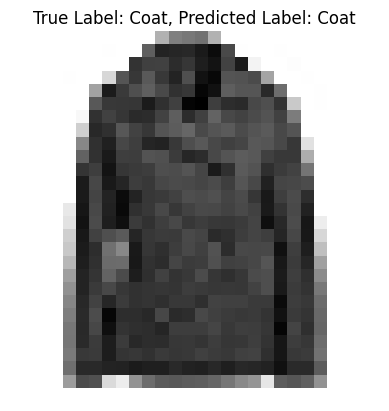

In [48]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Preprocessing function for a single image
def preprocess_single_image(img_row):
    img_array = np.array(img_row).reshape(1, ImageRows, IMG_COLS, 1)
    img_array = img_array / 255.0
    return img_array

# Prediction function for a single image
def predict_label(img_row):
    img_array = preprocess_single_image(img_row)
    prediction = model.predict(img_array)
    label = np.argmax(prediction, axis=1)
    return label[0]

# Function to plot a single image with its predicted label
def plot_image_with_prediction(img_row, true_label, labels):
    img_array = img_row.reshape(IMG_ROWS, IMG_COLS)
    predicted_label = predict_label(img_row)
    
    plt.imshow(img_array, cmap="Greys")
    plt.axis('off')
    plt.title(f'True Label: {labels[true_label]}, Predicted Label: {labels[predicted_label]}')
    plt.show()

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get a sample image and its true label from the test data
sample_index = int(input('sample index, (0-9,999)'))  
img_row = test_data.iloc[sample_index, 1:].values
true_label = test_data.iloc[sample_index, 0]

# Plot the image with its predicted label
plot_image_with_prediction(img_row, true_label, labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


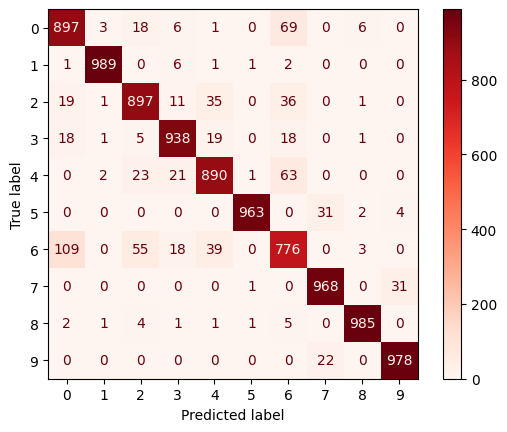

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(NUM_CLASSES))
disp.plot(cmap=plt.cm.Reds)
plt.show()
